In [1]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
import os
import cv2
import pandas as pd
import torch
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
#Configs
# path to directory to dump embeddings
run_id = 'run_1'
# number of frames to extract in a minute
frame_rate = 2
#maxID : number of products to process starting: 1001
max_id = 1050

In [3]:
def extract_frames(video_path, frame_rate):
    video_capture = cv2.VideoCapture(video_path)
    fps = video_capture.get(cv2.CAP_PROP_FPS)
    interval = int(fps / frame_rate)
    frame_number = 0
    frames = []
    while True:
        success, frame = video_capture.read()
        if not success:
            break
        if frame_number % interval == 0:
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frames.append(frame_rgb)

        frame_number += 1
    video_capture.release()
    return frames

In [4]:
def toFilter(path, maxNumber= 1999):
    try:
        number = path.split('_')[0]
        return int(number) <= maxNumber
    except:
        return False

In [5]:
embeddings = {}
video_frame_map = {}
video_frame_map_cropped = {}
video_frame_map_masked = {}
sift = cv2.SIFT_create()
def load_embeddings():
    path_to_videos = "./sourceDataVideos/"
    videos = os.listdir(path_to_videos)
    # videos = videos[:2]
    print(videos)
    count = 0
    for video in videos:
        if(not toFilter(video, max_id)):
            continue
        print("--------------------- Processing video: ", count, video)
        count += 1
        video_path = os.path.join(path_to_videos, video)
        frames = extract_frames(video_path, frame_rate)
        print("Number of frames: ", len(frames))
        id = video.split("_")[0]
        frame_number = 0
        for frame in frames:
            print("Processing frame: ", frame_number)
            image = frame
            # image = cv2.imread(Image.fromarray(frame), cv2.IMREAD_GRAYSCALE)
            keypoints, descriptors = sift.detectAndCompute(image, None)
            if descriptors is not None:
                embeddings[id + "_" + str(frame_number)] = descriptors
                video_frame_map[id + "_" + str(frame_number)] = image
            frame_number += 1
load_embeddings()

['1022_Lux-Soap_30.mp4', '1034_Tide-Surf_45.mp4', '1009_Wheel-Soap_10.mp4', '1046_Parachute-Oil_104.mp4', '1051_CorrianderPowder-Spices_5.mp4', '1027_Rin-Surf_10.mp4', '1054_Jeera-Spices_25.mp4', '1069_SmallRava1kg-Grains_40.mp4', '1082_GajrajRice500g-Grains_28.mp4', '1048_Maggi-Noodles_5.mp4', '1017_KrackJack-Biscuit_5.mp4', '1001_Dove-Soap_35.mp4', '1018_Glucose-Biscuit_10.mp4', '1016_Oreo-Biscuit_10.mp4', '1052_SambarPowder-Spices_10.mp4', '1005_Santoor-Soap_40.mp4', '1059_TurmericPowder-Spices_5.mp4', '.DS_Store', '1007_XXX-Soap_10.mp4', '1032_Ariel-Surf_10.mp4', '1066_GroundNut1kg-Grains_140.mp4', '1062_ChickenMasala-Spices_5.mp4', '1049_MustardSeeds-Spices_5.mp4', '1076_GroundNut500g-Grains_70.mp4', '1047_Yippee-Noodles_14.mp4', '1039_Wheel-Surf_38.mp4', '1015_AllRounder-Biscuit_5.mp4', '1058_Efkay-Tea_10.mp4', '1008_Diamond-Soap_10.mp4', '1055_GodavariGhee-Milk_10.mp4', '1050_Kumkum-Temple_5.mp4', '1079_SmallRava500g-Grains_20.mp4', '1040_XXX-Surf_38.mp4', '1014_ButterDelite-Bis

In [6]:
products = {}
def load_products():
    # Read the CSV file
    df = pd.read_csv('output.csv')

    # Create the dictionary
    for _, row in df.iterrows():
        product_id = str(row['id'])
        products[product_id] = {
            'id': product_id,
            'nickname': row['nickname'],
            'price': row['price']
        }
load_products()

In [7]:
images = {}
image_map = {}
image_cropped_map = {}
def load_images():
    path_to_images = "./sourceDataImages/"
    imageDirs = os.listdir(path_to_images)
    print(imageDirs)
    imageDirCount = 0
    for imageDir in imageDirs:
        try:
            if(not toFilter(imageDir, max_id)):
                continue
            print("Processing imageDir: ", imageDirCount)
            imagePaths = os.listdir(os.path.join(path_to_images, imageDir))
            count = 0
            print("Processing imageDir: ", imageDir)
            for imagePath in imagePaths:
                image = cv2.cvtColor(cv2.imread(os.path.join(path_to_images, imageDir, imagePath)), cv2.COLOR_BGR2RGB)
                # image = Image.open(os.path.join(path_to_images, imageDir, imagePath))
                if image is None:
                    continue

                # Detect SIFT keypoints and descriptors
                keypoints, descriptors = sift.detectAndCompute(image, None)
                if descriptors is not None:
                    images[imageDir + "_" + str(count)] = descriptors
                    image_map[imageDir + "_" + str(count) ] = image

                count += 1
        except:
            print("Error processing imageDir: ", imageDir)
        imageDirCount += 1
        
load_images()

['1069', '1056', '1051', '1058', '1067', '1060', '1034', '1033', '1005', '1002', '1061', '1059', '1066', '1050', '1068', '1057', '1003', '1032', '1035', '.DS_Store', '1028', '1017', '1010', '1019', '1026', '1021', '1081', '1075', '1072', '1044', '1043', '1020', '1018', '1027', '1011', '1029', '1016', '1042', '1045', '1073', '1074', '1080', '1030', '1037', '1008', '1001', '1006', '1039', '1052', '1055', '1063', '1064', '1007', '1038', '1036', '1009', '1031', '1065', '1062', '1054', '1053', '1071', '1082', '1076', '1049', '1040', '1047', '1078', '1013', '1014', '1022', '1025', '1046', '1079', '1041', '1077', '1083', '1048', '1070', '1024', '1023', '1015', '1012']
Processing imageDir:  0
Processing imageDir:  1034
Processing imageDir:  1
Processing imageDir:  1033
Processing imageDir:  2
Processing imageDir:  1005
Processing imageDir:  3
Processing imageDir:  1002
Processing imageDir:  4
Processing imageDir:  1050
Processing imageDir:  5
Processing imageDir:  1003
Processing imageDir:  6


In [8]:
bf = cv2.BFMatcher()
def searchProduct(imageFeatures):
    # Process the input image
    query_descriptors = imageFeatures.astype(np.float32)


    # Calculate cosine similarities
    similarities = []
    for id, embedding in embeddings.items():
        descriptors = embedding.astype(np.float32)
        matches = bf.knnMatch(query_descriptors, descriptors, k=2)
        good = []
        ratio = 0.75  # Adjust this value as needed
        for m, n in matches:
            if m.distance < ratio * n.distance:
                good.append([m])
        # similarity = cosine_similarity(query_embedding, embedding)
        similarities.append((id, len(good)))

    top_five = sorted(similarities, key=lambda item: item[1], reverse=True)[:5]
    # filtered_results = [(id, sim) for id, sim in top_five if sim > 0.8]
    # Get the product details for the top five items
    filtered_products = []
    for closest_id, maxSimilarity in top_five:
        # closest_id = closest_id.split("_")[0]
        product_details = products[closest_id.split("_")[0]]
        filtered_products.append((product_details, closest_id, maxSimilarity))

    return filtered_products

In [9]:

# brute_force.match(np.float32(images['1001_0']), np.float32(images['1002_0']))

In [ ]:
match = 0
for id, feature in images.items():
    product_id = id.split("_")[0]
    query_product = products[product_id]
    results = searchProduct(feature)
    print("Query: ", query_product, results)
    
    if query_product['id'] == results[0][0]['id']:
    # or query_product['id'] == results[1][0]['id'] or query_product['id'] == results[2][0]['id'] or query_product['id'] == results[3][0]['id'] or query_product['id'] == results[4][0]['id']:
        match += 1
    
    print(query_product['nickname'], "-------", results[0][0]['nickname'])
print("Match: ", match, "Total: ", len(images))

Query:  {'id': '1034', 'nickname': 'Tide Surf', 'price': 45} [({'id': '1034', 'nickname': 'Tide Surf', 'price': 45}, '1034_4', 541), ({'id': '1034', 'nickname': 'Tide Surf', 'price': 45}, '1034_5', 437), ({'id': '1032', 'nickname': 'Ariel Surf', 'price': 10}, '1032_7', 381), ({'id': '1007', 'nickname': 'XXX Soap', 'price': 10}, '1007_11', 342), ({'id': '1002', 'nickname': 'Cinthol Soap', 'price': 10}, '1002_9', 342)]
Tide Surf ------- Tide Surf
Query:  {'id': '1034', 'nickname': 'Tide Surf', 'price': 45} [({'id': '1029', 'nickname': 'Tide Surf', 'price': 45}, '1029_11', 550), ({'id': '1029', 'nickname': 'Tide Surf', 'price': 45}, '1029_7', 455), ({'id': '1034', 'nickname': 'Tide Surf', 'price': 45}, '1034_3', 385), ({'id': '1027', 'nickname': 'Rin Surf', 'price': 10}, '1027_2', 366), ({'id': '1027', 'nickname': 'Rin Surf', 'price': 10}, '1027_10', 364)]
Tide Surf ------- Tide Surf
Query:  {'id': '1033', 'nickname': 'SurfExcel Surf', 'price': 98} [({'id': '1033', 'nickname': 'SurfExcel 

Query:  {'id': '1005', 'nickname': 'Santoor Soap', 'price': 40} [({'id': '1002', 'nickname': 'Cinthol Soap', 'price': 10}, '1002_16', 300), ({'id': '1005', 'nickname': 'Santoor Soap', 'price': 40}, '1005_67', 299), ({'id': '1008', 'nickname': 'Diamond Soap', 'price': 10}, '1008_62', 281), ({'id': '1005', 'nickname': 'Santoor Soap', 'price': 40}, '1005_68', 268), ({'id': '1005', 'nickname': 'Santoor Soap', 'price': 40}, '1005_66', 266)]


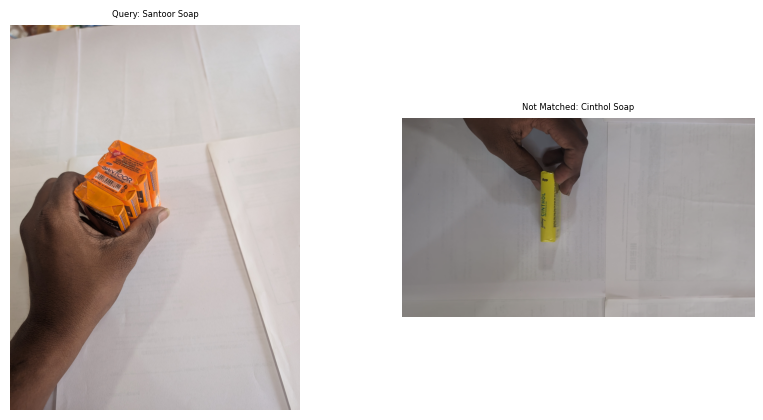

Santoor Soap ------- Cinthol Soap


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x107951890>>
Traceback (most recent call last):
  File "/Users/akhilralla/Desktop/billing-server/myenv/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


Query:  {'id': '1005', 'nickname': 'Santoor Soap', 'price': 40} [({'id': '1005', 'nickname': 'Santoor Soap', 'price': 40}, '1005_51', 296), ({'id': '1005', 'nickname': 'Santoor Soap', 'price': 40}, '1005_52', 281), ({'id': '1005', 'nickname': 'Santoor Soap', 'price': 40}, '1005_53', 279), ({'id': '1005', 'nickname': 'Santoor Soap', 'price': 40}, '1005_95', 238), ({'id': '1005', 'nickname': 'Santoor Soap', 'price': 40}, '1005_97', 232)]


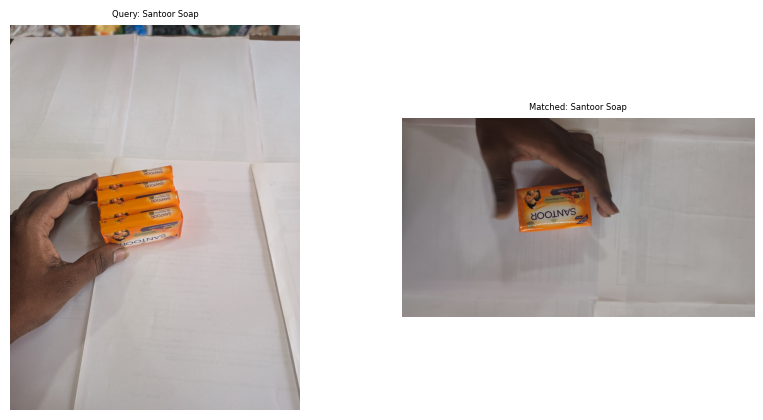

Santoor Soap ------- Santoor Soap


In [ ]:

match = 0
for id, feature in images.items():
    product_id = id.split("_")[0]
    query_product = products[product_id]
    results = searchProduct(feature)
    print("Query: ", query_product, results)
    
    
        
    # Plot images in a 2x1 matrix
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Plot the query image
    query_image = image_map[id]
    axes[0].imshow(query_image)
    axes[0].set_title(f"Query: {query_product['nickname']}", fontsize=6)
    axes[0].axis('off')

    # query_crop_image = image_cropped_map[id]
    # axes[1].imshow(query_crop_image)
    # axes[1].set_title(f"QueryCropped: {query_product['nickname']}", fontsize=6)
    # axes[1].axis('off')

    # Plot the matched video frame
    if product_id == results[0][0]['id']:
        matchString = "Matched"
    else:
        matchString = "Not Matched"
    matched_id = results[0][1]
    matched_frame = video_frame_map[matched_id]
    axes[1].imshow(matched_frame)
    axes[1].set_title(f"{matchString}: {results[0][0]['nickname']}", fontsize=6)
    axes[1].axis('off')

    # axes[3].imshow(video_frame_map_masked[matched_id])
    # axes[3].set_title(f"{matchString}: {results[0][0]['nickname']}", fontsize=6)
    # axes[3].axis('off')

    # axes[4].imshow(video_frame_map_cropped[matched_id])
    # axes[4].set_title(f"{matchString}: {results[0][0]['nickname']}", fontsize=6)
    # axes[4].axis('off')


    plt.show()
    if product_id == results[0][0]['id']:
        match += 1
    
    print(query_product['nickname'], "-------", results[0][0]['nickname'])
print("Match: ", match, "Total: ", len(images))

In [ ]:
# variables_to_dump = {
#     'embeddings': embeddings,
#     'video_frame_map': video_frame_map,
#     'video_frame_map_cropped': video_frame_map_cropped,
#     'video_frame_map_masked': video_frame_map_masked,
#     'products': products,
#     'images': images,
#     'image_map': image_map,
#     'image_cropped_map': image_cropped_map
# }

# if os.path.exists(run_id):
#     print("Directory already exists, skipping saving variables")
#     exit()

# if not os.path.exists(run_id):
#     os.makedirs(run_id)

# for name, variable in variables_to_dump.items():
#     torch.save(variable, os.path.join(run_id, name + ".pt"))